In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import nibabel as nib

epi2='/Users/kasia/Documents/Topology/brain_mag1_2reg_vox15.nii.gz'


#epi2='/Users/kasia/Documents/Topology/brain_mag100_2reg.nii'

epi = nib.load(epi2)

epi_data = epi.get_fdata()

epi_data.shape

from skimage.filters import gaussian



In [2]:
epi_data.shape

(79, 95, 79, 90)

In [3]:
X=epi_data.T

In [4]:
X=np.vstack((X,X[::-1]))

In [5]:
X=X.reshape(X.shape[0], -1)

In [6]:
X.shape

(180, 592895)

In [7]:
from sklearn.preprocessing import StandardScaler



In [8]:
#X=np.arcsinh(X/5)

In [9]:
#X=X[np.random.permutation(len(X))]

In [10]:
time_range = np.zeros(len(X))
#cond_A = np.concatenate((np.arange(1,6), np.arange(23,29), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(12,18), np.arange(34,40),np.arange(45,51)))
    
#cond_A = np.concatenate((np.arange(1,6), np.arange(34,40), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(12,18), np.arange(23,29), np.arange(45,51)))

#vox=100
#cond_A = np.concatenate((np.arange(1,6), np.arange(12,18), np.arange(23,29)))
#cond_B = np.concatenate((np.arange(34,40), np.arange(46,52), np.arange(57,63)))

#vox=5
#cond_A = np.concatenate((np.arange(12,18), np.arange(23,29), np.arange(46,52)))
#cond_B = np.concatenate((np.arange(0,6), np.arange(34,40), np.arange(57,63)))

#mag0.5
#cond_A = np.concatenate((np.arange(12,18), np.arange(23,29), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(0,6), np.arange(34,40), np.arange(46,52)))

#mag80
#cond_A = np.concatenate((np.arange(23,29), np.arange(34,40), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(0,6), np.arange(12,18), np.arange(46,52)))

#mag60
#cond_A = np.concatenate((np.arange(0,6), np.arange(12,18), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(23,29), np.arange(34,40), np.arange(46,52)))

#mag40
#cond_A = np.concatenate((np.arange(0,6), np.arange(12,18), np.arange(34,40)))
#cond_B = np.concatenate((np.arange(23,29), np.arange(46,52), np.arange(57,63)))

#mag20
#cond_A = np.concatenate((np.arange(34,40), np.arange(46,52), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(0,6), np.arange(12,18), np.arange(23,29)))

#mag10
#cond_A = np.concatenate((np.arange(23,29), np.arange(46,52), np.arange(57,63)))
#cond_B = np.concatenate((np.arange(0,6), np.arange(12,18), np.arange(34,40)))

#mag1
cond_A = np.concatenate((np.arange(0,6), np.arange(23,29), np.arange(34,40)))
cond_B = np.concatenate((np.arange(12,18), np.arange(46,52), np.arange(57,63)))



cond_A=cond_A+3
cond_B=cond_B+3


In [11]:
cond_A=np.concatenate((cond_A,len(X)-cond_A-1))
cond_B=np.concatenate((cond_B,len(X)-cond_B-1))

In [12]:
cond_A=cond_A[np.argsort(cond_A)]
cond_B=cond_B[np.argsort(cond_B)]

In [13]:
cond_A

array([  3,   4,   5,   6,   7,   8,  26,  27,  28,  29,  30,  31,  37,
        38,  39,  40,  41,  42, 137, 138, 139, 140, 141, 142, 148, 149,
       150, 151, 152, 153, 171, 172, 173, 174, 175, 176])

In [14]:
from sklearn.model_selection import train_test_split
A_train, A_test = train_test_split(cond_A, test_size=0.2)
B_train, B_test = train_test_split(cond_B, test_size=0.2)

In [15]:
A_train

array([ 39,   3,  26,  29,   4, 137, 139, 174,   8, 152, 140,  30, 173,
        41,  28,  40,  42,  27,  37, 149, 151,   7, 153, 150,  38, 172,
       175,   5])

In [16]:
x = cdist(X, np.mean(X[A_train], axis=0)[None,:])
y = cdist(X, np.mean(X[B_train], axis=0)[None,:])

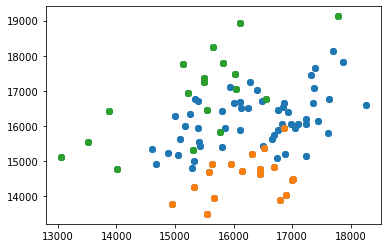

In [17]:
plt.scatter(x,y)
plt.scatter(x[cond_B], y[cond_B])
plt.scatter(x[cond_A], y[cond_A])

/Users/kasia/anaconda3/envs/dyneusr/lib/python3.7/site-packages/umap/umap_.py:1504: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


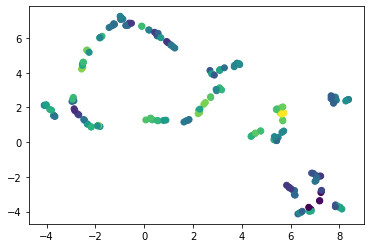

In [18]:
dists = cdist(X, X)

reducer = umap.UMAP(metric='precomputed')

projection = reducer.fit_transform(dists)

total_intensity = X.sum(axis=1)

plt.scatter(*projection.T, c=total_intensity)

In [19]:
total_intensity = X.sum(axis=1)

time_A = time_range.copy()
time_A[cond_A] = 1
time_B = time_range.copy()
time_B[cond_B] = 1


cond_rest = np.arange(len(X))
cond_rest = np.setdiff1d(cond_rest, cond_A)
cond_rest = np.setdiff1d(cond_rest, cond_B)



In [20]:
#cond_A=cond_A+3

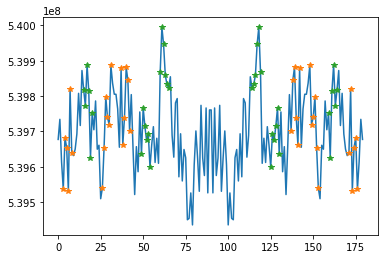

In [21]:
plt.plot(total_intensity)
plt.plot(cond_A, total_intensity[cond_A], '*')
plt.plot(cond_B, total_intensity[cond_B], '*')

In [22]:
(cond_B, total_intensity[cond_B])

(array([ 15,  16,  17,  18,  19,  20,  49,  50,  51,  52,  53,  54,  60,
         61,  62,  63,  64,  65, 114, 115, 116, 117, 118, 119, 125, 126,
        127, 128, 129, 130, 159, 160, 161, 162, 163, 164]),
 array([5.39817781e+08, 5.39772611e+08, 5.39887612e+08, 5.39813412e+08,
        5.39626248e+08, 5.39751508e+08, 5.39636387e+08, 5.39766911e+08,
        5.39714399e+08, 5.39674654e+08, 5.39693433e+08, 5.39599699e+08,
        5.39867867e+08, 5.39994464e+08, 5.39945937e+08, 5.39858586e+08,
        5.39832737e+08, 5.39822899e+08, 5.39822899e+08, 5.39832737e+08,
        5.39858586e+08, 5.39945937e+08, 5.39994464e+08, 5.39867867e+08,
        5.39599699e+08, 5.39693433e+08, 5.39674654e+08, 5.39714399e+08,
        5.39766911e+08, 5.39636387e+08, 5.39751508e+08, 5.39626248e+08,
        5.39813412e+08, 5.39887612e+08, 5.39772611e+08, 5.39817781e+08]))

In [23]:
total_intensity[cond_B[:len(cond_B)//2]]

array([5.39817781e+08, 5.39772611e+08, 5.39887612e+08, 5.39813412e+08,
       5.39626248e+08, 5.39751508e+08, 5.39636387e+08, 5.39766911e+08,
       5.39714399e+08, 5.39674654e+08, 5.39693433e+08, 5.39599699e+08,
       5.39867867e+08, 5.39994464e+08, 5.39945937e+08, 5.39858586e+08,
       5.39832737e+08, 5.39822899e+08])

In [24]:
total_intensity[cond_B[len(cond_B)//2:]]

array([5.39822899e+08, 5.39832737e+08, 5.39858586e+08, 5.39945937e+08,
       5.39994464e+08, 5.39867867e+08, 5.39599699e+08, 5.39693433e+08,
       5.39674654e+08, 5.39714399e+08, 5.39766911e+08, 5.39636387e+08,
       5.39751508e+08, 5.39626248e+08, 5.39813412e+08, 5.39887612e+08,
       5.39772611e+08, 5.39817781e+08])

In [25]:
total_intensity-total_intensity[::-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
dists[cond_rest][:, cond_rest].max()

26145.540568701592

In [27]:
dists[cond_A][:, cond_B].mean()

22248.711209784924

In [28]:
dists[cond_A][:, cond_A].mean()

20988.6788804766

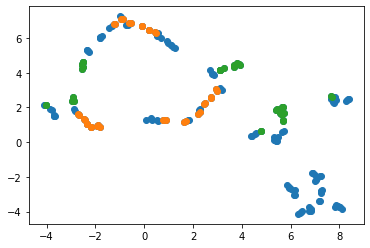

In [29]:
plt.scatter(*projection.T)
plt.scatter(*projection[cond_A].T)
plt.scatter(*projection[cond_B].T)

array([[ 0.4958906 ,  6.265286  ],
       [ 0.20119855,  6.4555526 ],
       [-0.8768214 ,  7.091372  ],
       [-0.6161014 ,  6.8608646 ],
       [-0.09450383,  6.676408  ],
       [-1.2520581 ,  6.826456  ],
       [-2.6849103 ,  1.5719945 ],
       [-2.4441657 ,  1.2508175 ],
       [-2.1742835 ,  0.88742876],
       [-2.3367722 ,  1.0473799 ],
       [-1.8144075 ,  0.90146184],
       [-1.8812126 ,  0.95471126],
       [ 2.2107048 ,  1.6400576 ],
       [ 1.626244  ,  1.1587334 ],
       [ 0.787492  ,  1.2530509 ],
       [ 2.4447892 ,  2.187361  ],
       [ 2.7219725 ,  2.615816  ],
       [ 2.9638207 ,  2.9626725 ],
       [ 2.946814  ,  3.037731  ],
       [ 2.7256665 ,  2.5724013 ],
       [ 2.5058856 ,  2.2842786 ],
       [ 0.8889684 ,  1.2691755 ],
       [ 1.7193149 ,  1.2326423 ],
       [ 2.2703016 ,  1.710281  ],
       [-1.8803542 ,  0.97230273],
       [-1.9231179 ,  0.9384467 ],
       [-2.328816  ,  1.038949  ],
       [-2.179636  ,  0.8693825 ],
       [-2.4832191 ,

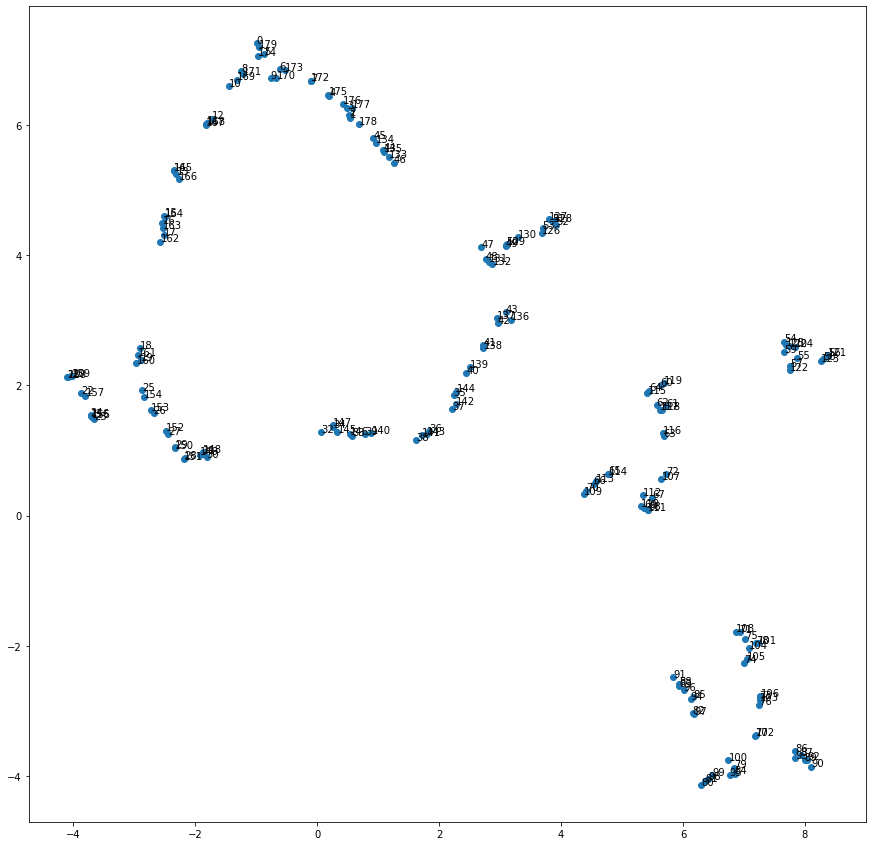

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(*projection.T)

for i, point in enumerate(projection):
    ax.annotate(i, point)



projection[cond_A]